In [9]:
import yfinance as yf
import pandas as pd

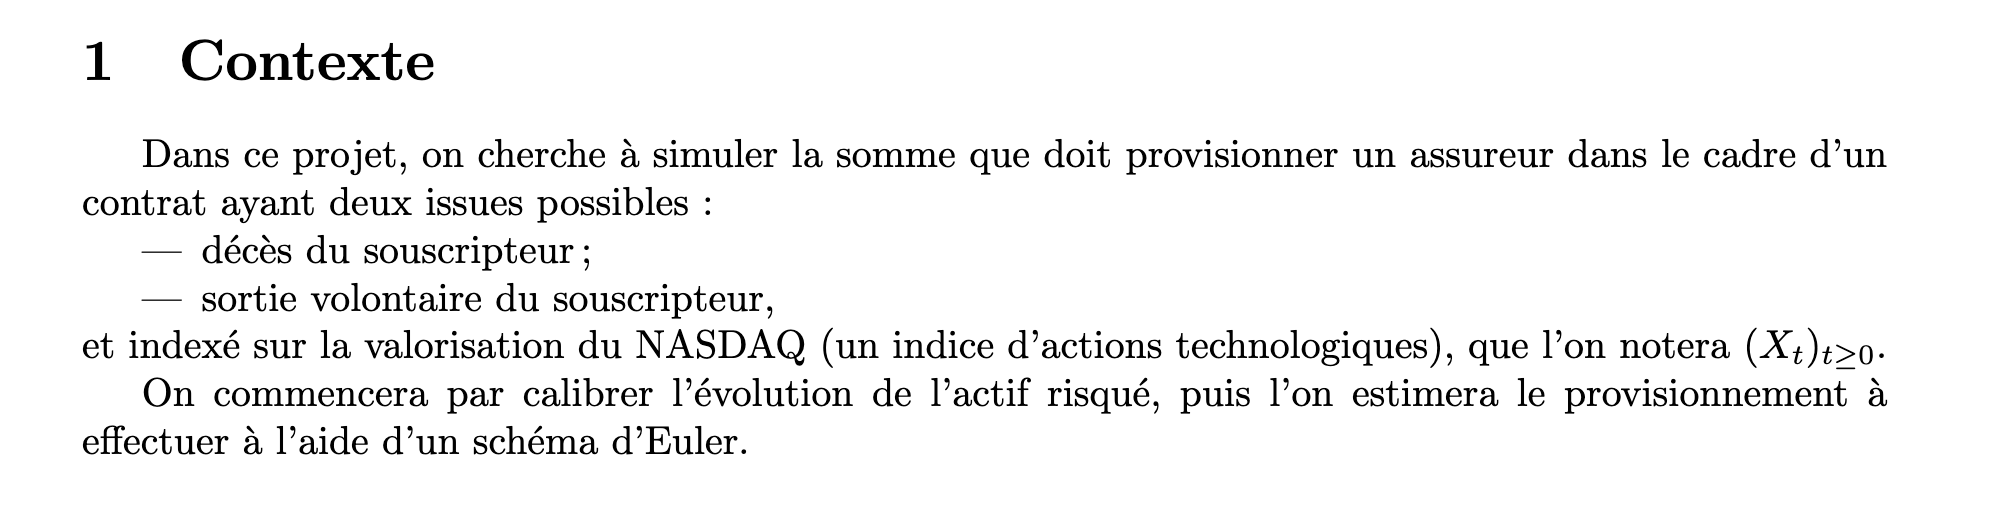

In [39]:
df_ixic = yf.download("^IXIC")
df_ixic.columns=["close","high","low","open","volume"]

[*********************100%***********************]  1 of 1 completed


In [27]:
import requests

url = "https://api.nasdaq.com/api/quote/NDX/option-chain?assetclass=index&limit=1200"

payload = {}
headers = {
  'accept': 'application/json, text/plain, */*',
  'accept-language': 'en-US,en;q=0.7',
  'origin': 'https://www.nasdaq.com',
  'priority': 'u=1, i',
  'referer': 'https://www.nasdaq.com/',
  'sec-ch-ua': '"Brave";v="141", "Not?A_Brand";v="8", "Chromium";v="141"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"macOS"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site': 'same-site',
  'sec-gpc': '1',
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36'
}

response = requests.request("GET", url, headers=headers, data=payload).json()
df=pd.DataFrame(response["data"]["table"]["rows"])
df_ndx_put_option = df[df["expirygroup"]==""]

In [28]:
df_ndx_put_option

,expirygroup,expiryDate,c_Last,c_Change,c_Bid,c_Ask,c_Volume,c_Openinterest,c_colour,strike,p_Last,p_Change,p_Bid,p_Ask,p_Volume,p_Openinterest,p_colour,drillDownURL
1,,Oct 28,--,--,"2,423.10","2,623.10",--,--,True,"23,300.00",0.60,-15.00,--,0.35,7,10,False,/market-activity/index/ndx/option-chain/call-p...
2,,Oct 28,--,--,"2,323.20","2,523.20",--,--,True,"23,400.00",0.50,-20.95,0.10,0.40,52,5,False,/market-activity/index/ndx/option-chain/call-p...
3,,Oct 28,--,--,"2,223.20","2,423.20",--,--,True,"23,500.00",0.50,-2.92,0.15,0.40,11,16,False,/market-activity/index/ndx/option-chain/call-p...
4,,Oct 28,--,--,"2,213.20","2,413.20",--,--,True,"23,510.00",--,--,--,0.40,--,--,False,/market-activity/index/ndx/option-chain/call-p...
5,,Oct 28,--,--,"2,203.20","2,403.20",--,--,True,"23,520.00",--,--,--,0.45,--,--,False,/market-activity/index/ndx/option-chain/call-p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,,Oct 31,--,--,0.85,1.45,--,--,False,"28,000.00",--,--,"2,064.70","2,264.70",--,--,True,/market-activity/index/ndx/option-chain/call-p...
1100,,Oct 31,0.50,0.15,0.75,1.35,3,4,False,"28,100.00",--,--,"2,164.50","2,364.50",--,--,True,/market-activity/index/ndx/option-chain/call-p...
1101,,Oct 31,0.35,-2.65,0.40,1.60,1,2,False,"28,200.00",--,--,"2,264.30","2,464.30",--,--,True,/market-activity/index/ndx/option-chain/call-p...
1102,,Oct 31,0.73,-2.05,0.55,1.15,2,2,False,"28,300.00",--,--,"2,364.10","2,564.10",--,--,True,/market-activity/index/ndx/option-chain/call-p...


In [40]:
df_ndx_put_option.to_csv("../data/sujet6/ndx_put_option.csv",index=False)
df_ixic.to_csv("../data/sujet6/ixic.csv")